### Import all libraries

In [101]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Libraries for machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbor 
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier 
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.naive_bayes import GaussianNB

# Libraries for data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Library for data splitting
from sklearn.model_selection import train_test_split

# Library for classification tasks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Since am using Jupyter Notebook, I'm adding this to ensure that plots display correctly:
%matplotlib inline


### Import weather classification dataset

In [102]:
weather_df= pd.read_csv(r"C:\Users\Sherif Atanda\Downloads\Weather_classification_Dataset\weather_classification_data.csv")

#Viewing the first five rows of the dataset 
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


## Exploratory Data Analysis (EDA)

### Viewing the shape of the dataset

In [103]:
weather_df.shape # This means the number of observations and fields

(13200, 11)

### Viewing more information about the dataset

In [104]:
weather_df.info() # This reveals there is absence of null values. Also, some fields are categorical and will have to be converted to numeric so as
# to make them suitable for the machine learning algorithms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


### Viewing statistical summary of the dataset

In [105]:
weather_df.describe() #It is visible from here that some fields have outliers, an example is temperature having a maximum value of 109 which is extreme.

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### Visualization of the outliers revealing which fields they are present in

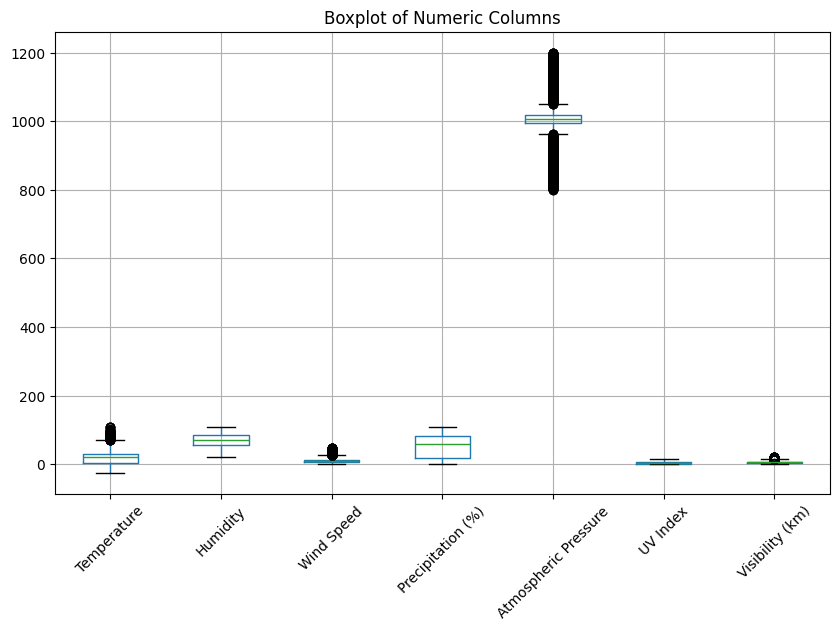

In [106]:
def visualize_boxplots(weather_df):
    """
    Function to visualize boxplots for all numeric columns in a dataset.
    """
    numeric_cols = weather_df.select_dtypes(include=['int', 'float'])
    
    if numeric_cols.empty:
        print("No numeric columns found.")
        return
    
    numeric_cols.boxplot(figsize=(10, 6))
    plt.xticks(rotation=45)
    plt.title("Boxplot of Numeric Columns")
    plt.show()
visualize_boxplots(weather_df)


### Visualization of distribution of values for each fields(numeric)

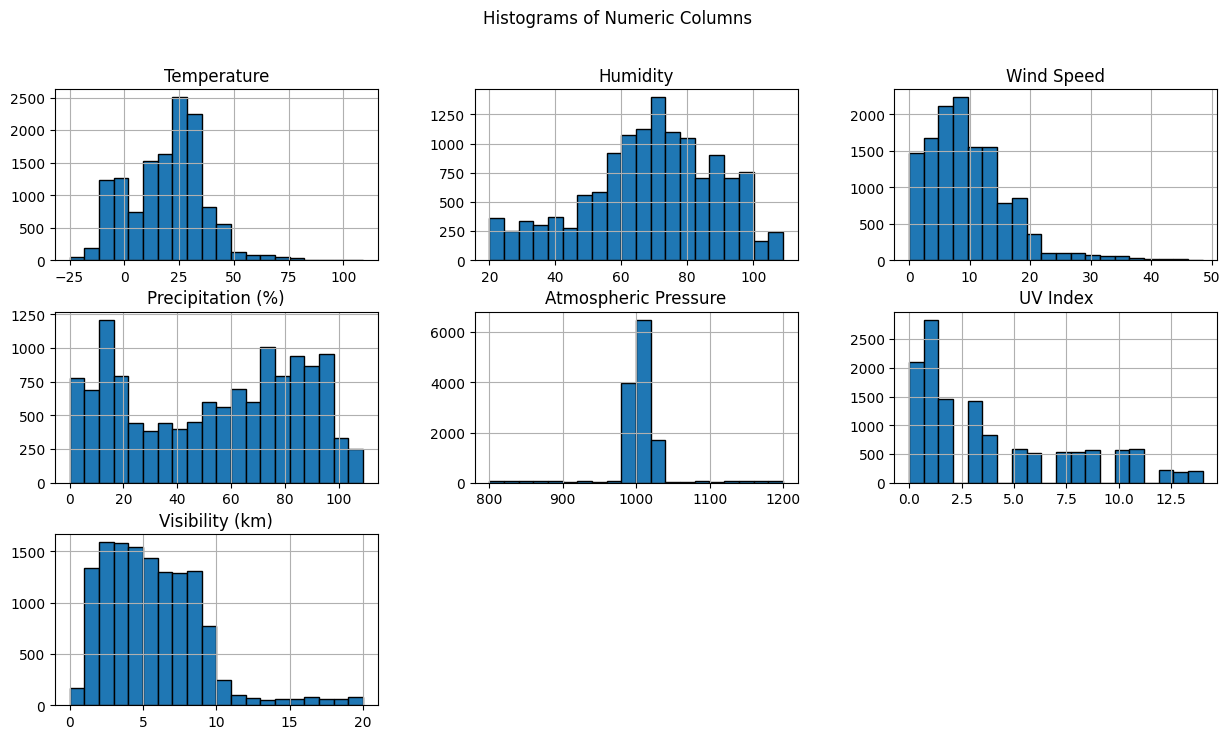

In [107]:
def visualize_histograms(weather_df):
    """
    Function to visualize histograms for all numeric columns in a dataset.
    """
    numeric_cols = weather_df.select_dtypes(include=['int', 'float'])
    
    if numeric_cols.empty:
        print("No numeric columns found.")
        return
    
    numeric_cols.hist(figsize=(15, 8), bins=20, edgecolor='black')
    plt.suptitle("Histograms of Numeric Columns")
    plt.show()


visualize_histograms(weather_df)

### Removal of Outliers from the dataset to make it more suitable for analysis

In [108]:
def remove_outliers(weather_df):
    """
    Function to remove outliers from all numeric columns in a dataset using the IQR method.
    """
    numeric_cols = weather_df.select_dtypes(include=['int', 'float'])

    for col in numeric_cols.columns:
        Q1 = weather_df[col].quantile(0.25)
        Q3 = weather_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only values within the boundary
        weather_df_new = weather_df[(weather_df[col] >= lower_bound) & (weather_df[col] <= upper_bound)]
    
    return weather_df_new

weather_df_new = remove_outliers(weather_df)

### Viewing the shape of the dataset when outliers are removed

In [109]:
weather_df_new.shape

(12817, 11)

### Converting the cloud cover feature from categorical to numeric using One Hot Encoding

In [110]:
dummies_cloud_cover = pd.get_dummies(weather_df_new["Cloud Cover"], drop_first=True)
dummies_cloud_cover = dummies_cloud_cover.astype(int) 
dummies_cloud_cover

,cloudy,overcast,partly cloudy
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
13195,0,1,0
13196,1,0,0
13197,0,1,0
13198,0,1,0


### Converting the season feature from categorical to numeric using One Hot Encoding

In [111]:
dummies_season = pd.get_dummies(weather_df_new["Season"], drop_first=True)
dummies_season = dummies_season.astype(int) 
dummies_season

,Spring,Summer,Winter
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
13195,0,1,0
13196,0,0,1
13197,0,0,0
13198,0,0,1


### Converting the weather type(dependent/target variable) column from categorical to numeric using Label Encoder 

In [112]:
le = LabelEncoder()
weather_type_reclassified = le.fit_transform(weather_df_new["Weather Type"])
weather_type_reclassified

array([1, 0, 3, ..., 0, 2, 1])

### Now, defining the dataset to be used and perform necessary joining

In [113]:
weather_df_first = weather_df_new.drop(["Cloud Cover", "Season", "Location", "Weather Type"], axis = "columns")
weather_df_first.head()


# Adding the dummies_cloud_cover and dummies_Season columns to this table
weather_df_merged = pd.concat([weather_df_first,dummies_cloud_cover, dummies_season], axis = "columns")
weather_df_merged.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),cloudy,overcast,partly cloudy,Spring,Summer,Winter
0,14,73,9.5,82,1010.82,2,3.5,0,0,1,0,0,1
1,39,96,8.5,71,1011.43,7,10.0,0,0,1,1,0,0
2,30,64,7.0,16,1018.72,5,5.5,0,0,0,1,0,0
3,38,83,1.5,82,1026.25,7,1.0,0,0,0,1,0,0
4,27,74,17.0,66,990.67,1,2.5,0,1,0,0,0,1


### Defining X (feature variables) and y (target variables) 

In [114]:
X = weather_df_merged
y = weather_type_reclassified
print (X.shape, y.shape)

(12817, 13) (12817,)


### Performing standardization on the dataset (X_train and X_test)

In [115]:
sc = StandardScaler()
X_scaled = sc.fit_transform(weather_df_merged)
X_scaled

array([[-0.30676567,  0.18628629, -0.05685325, ..., -0.49225857,
        -0.48097637,  1.15029687],
       [ 1.1429547 ,  1.33659048, -0.20046541, ...,  2.03145268,
        -0.48097637, -0.8693408 ],
       [ 0.62105537, -0.26383274, -0.41588365, ...,  2.03145268,
        -0.48097637, -0.8693408 ],
       ...,
       [ 0.62105537,  0.38633919, -0.63130189, ..., -0.49225857,
        -0.48097637, -0.8693408 ],
       [-0.94464264,  0.33632597,  0.01495283, ..., -0.49225857,
        -0.48097637,  1.15029687],
       [-1.40855316, -1.5641766 , -1.42116877, ..., -0.49225857,
        -0.48097637, -0.8693408 ]])

### Splitting the dataset into training and set sets

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y,
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                    stratify = y)


### Instantiating the machine learning algorithms

In [117]:
knn = KNeighborsClassifier(n_neighbors = 8)
log_reg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

### Creating an iterative process for computing the accuracy score, classification report, confusion matrix and heatmap of each algorithm


Model: KNN
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       966
           1       0.89      0.91      0.90       960
           2       0.96      0.96      0.96       957
           3       0.96      0.90      0.93       963

    accuracy                           0.92      3846
   macro avg       0.92      0.92      0.92      3846
weighted avg       0.92      0.92      0.92      3846


Confusion Matrix:
[[877  66   7  16]
 [ 54 876  19  11]
 [ 21  10 915  11]
 [ 52  28  13 870]]


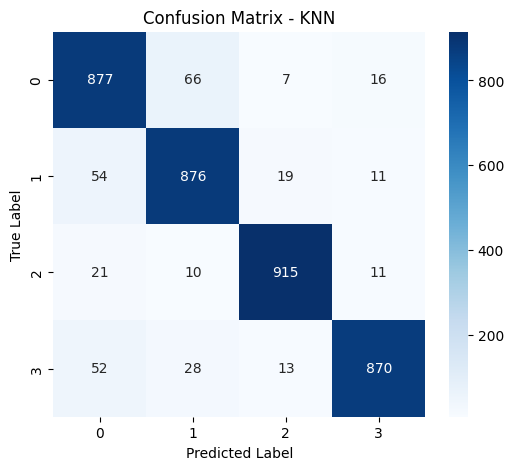



Model: Logistic Regression
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       966
           1       0.88      0.89      0.89       960
           2       0.93      0.96      0.94       957
           3       0.95      0.89      0.92       963

    accuracy                           0.91      3846
   macro avg       0.91      0.91      0.91      3846
weighted avg       0.91      0.91      0.91      3846


Confusion Matrix:
[[858  73  13  22]
 [ 49 857  45   9]
 [ 14  14 916  13]
 [ 63  31  13 856]]


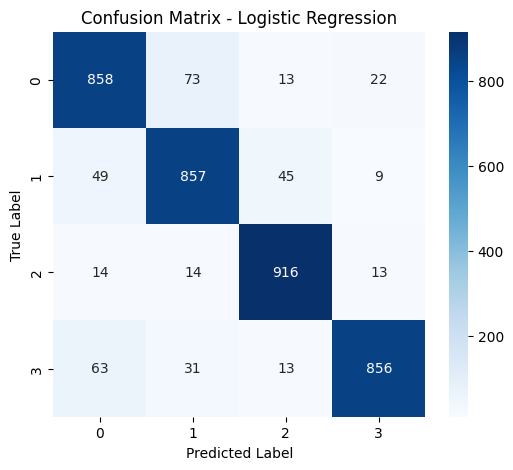



Model: SVC
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       966
           1       0.92      0.93      0.92       960
           2       0.96      0.96      0.96       957
           3       0.96      0.92      0.94       963

    accuracy                           0.93      3846
   macro avg       0.93      0.93      0.93      3846
weighted avg       0.93      0.93      0.93      3846


Confusion Matrix:
[[885  50  14  17]
 [ 47 890  13  10]
 [ 25   8 917   7]
 [ 49  18  14 882]]


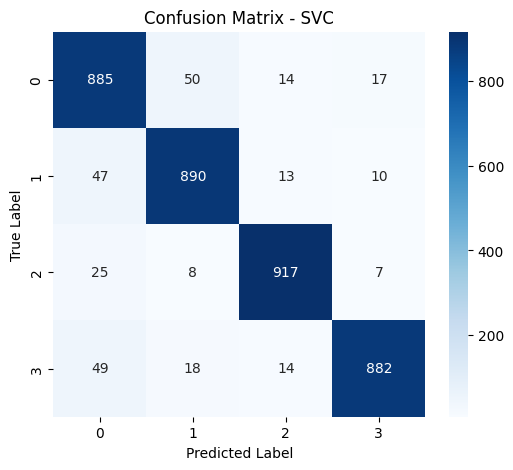



Model: Decision Tree
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       966
           1       0.92      0.92      0.92       960
           2       0.95      0.96      0.95       957
           3       0.95      0.93      0.94       963

    accuracy                           0.93      3846
   macro avg       0.93      0.93      0.93      3846
weighted avg       0.93      0.93      0.93      3846


Confusion Matrix:
[[885  38  17  26]
 [ 50 883  14  13]
 [ 19  16 915   7]
 [ 31  19  22 891]]


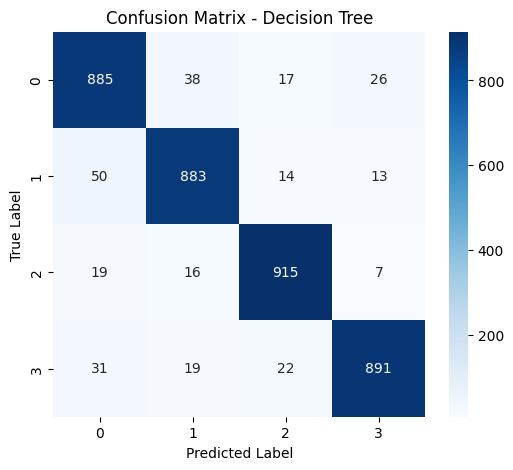



Model: Random Forest
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       966
           1       0.93      0.93      0.93       960
           2       0.97      0.95      0.96       957
           3       0.94      0.93      0.94       963

    accuracy                           0.94      3846
   macro avg       0.94      0.94      0.94      3846
weighted avg       0.94      0.94      0.94      3846


Confusion Matrix:
[[895  42   6  23]
 [ 45 896   7  12]
 [ 19   7 913  18]
 [ 36  15  15 897]]


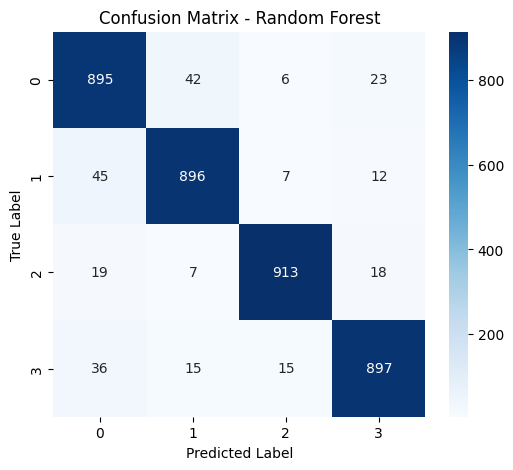



Model: Naive Bayes
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       966
           1       0.85      0.81      0.83       960
           2       0.86      0.95      0.90       957
           3       0.89      0.90      0.90       963

    accuracy                           0.87      3846
   macro avg       0.88      0.88      0.87      3846
weighted avg       0.88      0.87      0.87      3846


Confusion Matrix:
[[808  81  18  59]
 [ 40 777 120  23]
 [ 13   7 910  27]
 [ 31  54   8 870]]


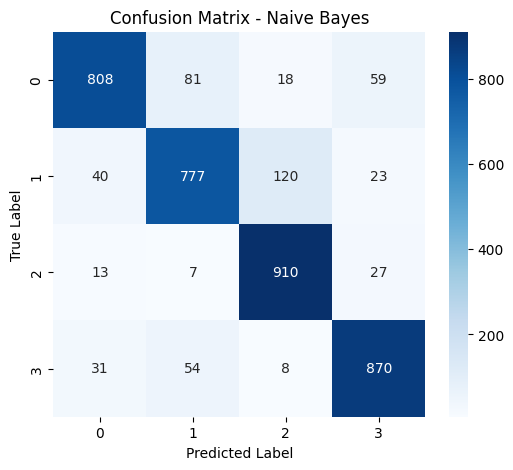

In [123]:
ml_algorithms = [knn, log_reg, svc, dtc, rfc, gnb]
model_names = ["KNN", "Logistic Regression", "SVC", "Decision Tree", "Random Forest", "Naive Bayes"]

accuracy_score_list = []

# Loop through models and print reports
for model, name in zip(ml_algorithms, model_names):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    
    # Compute accuracy
    acc_score = accuracy_score(y_test, y_pred)
    accuracy_score_list.append(acc_score)

    # Print model name
    print(f"\n{'='*40}")
    print(f"Model: {name}")
    print(f"Accuracy: {acc_score:.2f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot heatmap for confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()  # Show plot for each model

    print(f"{'='*40}\n")

### Creating a dataframe to store the machine learning algorithms and their respective accuracy score

In [124]:
ml_algorithm_df = pd.DataFrame({
    "ml_algorithm": ml_algorithms,
    "ml_algorithms_short_name": ["KNN", 
            "LOG_REG",
            "SVC",
            "DTC",
            "RFC",
            "GNB"],
    "accuracy_score": accuracy_score_list
})

# Viewing the dataframe created 
ml_algorithm_df

,ml_algorithm,ml_algorithms_short_name,accuracy_score
0,KNeighborsClassifier(n_neighbors=8),KNN,0.919917
1,LogisticRegression(),LOG_REG,0.906656
2,SVC(),SVC,0.929277
3,DecisionTreeClassifier(),DTC,0.929277
4,"(DecisionTreeClassifier(max_features='sqrt', r...",RFC,0.936297
5,GaussianNB(),GNB,0.874935


### Plotting a bar chart to visualize the accuracy of the algorithms

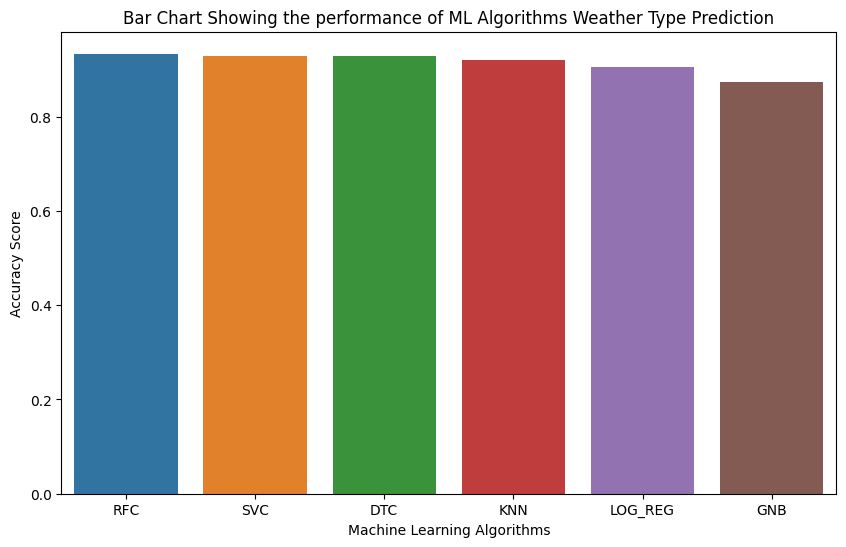

In [121]:
# Sorting the accuracy score in descending order
ml_algorithm_df = ml_algorithm_df.sort_values(by="accuracy_score", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    x = ml_algorithm_df["ml_algorithms_short_name"],
    y = ml_algorithm_df["accuracy_score"],
    hue = ml_algorithm_df["ml_algorithms_short_name"],
    data = ml_algorithm_df
)

plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Bar Chart Showing the performance of ML Algorithms Weather Type Prediction")
plt.show()


## End of project

### The documentation for this project can be found in the readme file 